In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix

from time import thread_time_ns

In [2]:
df = pd.read_csv('dell_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683708 entries, 0 to 2683707
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       int64  
 2   code_type  object 
 3   timestamp  float64
 4   llcm       int64  
 5   l2ch       int64  
 6   l1ch       int64  
 7   stalls     int64  
 8   label      object 
dtypes: float64(1), int64(5), object(3)
memory usage: 184.3+ MB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683708 entries, 0 to 2683707
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       int64  
 2   code_type  object 
 3   timestamp  float64
 4   llcm       int64  
 5   l2ch       int64  
 6   l1ch       int64  
 7   stalls     int64  
 8   label      object 
dtypes: float64(1), int64(5), object(3)
memory usage: 184.3+ MB


In [5]:
df.describe()

,load,timestamp,llcm,l2ch,l1ch,stalls
count,2.683708e+06,2.683708e+06,2.683708e+06,2.683708e+06,2.683708e+06,2.683708e+06
mean,5.310500e+00,1.546330e+02,2.305793e+04,1.168299e+04,3.095153e+05,4.071005e+06
std,3.779232e+00,1.388007e+02,5.537775e+04,3.008037e+04,7.219926e+05,1.875140e+06
min,0.000000e+00,1.060122e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.855220e+01,4.504000e+03,0.000000e+00,2.240000e+02,3.262907e+06
50%,8.000000e+00,9.587421e+01,1.031400e+04,1.000000e+00,2.533600e+04,4.201836e+06
75%,8.000000e+00,2.344870e+02,1.954100e+04,1.540000e+02,7.387300e+04,5.327620e+06
max,8.000000e+00,6.251454e+02,7.497388e+06,2.107480e+06,5.246573e+07,1.367443e+08


In [6]:
samples=df.drop(columns=['label', 'code_type', 'timestamp', 'load', 'laptop'])
#samples['laptop'].replace(['lenovo', 'asus', 'dell'], [1, 2, 3], inplace=True)
#samples['laptop'] = samples['laptop'].astype("int64")
samples

,llcm,l2ch,l1ch,stalls
0,193,1228,22663,183581
1,4159,17,335,1102570
2,5326,1,40,1259932
3,7404,0,44,1645650
4,9092,0,40,1961196
...,...,...,...,...
2683703,30605,10457,85170,3001858
2683704,29673,10124,84262,3053143
2683705,30237,10537,79863,3026170
2683706,28959,10085,77161,2892587


In [7]:
labels = df['label'].replace(['no_attack', 'attack'], [0, 1])
labels = labels.astype('int64')
labels

0          1
1          1
2          1
3          1
4          1
          ..
2683703    0
2683704    0
2683705    0
2683706    0
2683707    0
Name: label, Length: 2683708, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, train_size = 0.5, random_state= 33, shuffle = True)

In [9]:
def evaluate(model):
    # https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    n = tn + fp + fn + tp
    print((tn, tp, fn, fp))
    return f'accuracy: {(tp+tn)*100.0/n}%\nfalse positives: {fp*100.0/n}%\nfalse negatives: {fn*100.0/n}%'

In [10]:
log_reg_model = LogisticRegression(random_state=33)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=33)

In [11]:
log_reg_model.score(X_test, y_test)

0.998993184057282

In [12]:
print(evaluate(log_reg_model))

(284927, 1055576, 449, 902)
accuracy: 99.8993184057282%
false positives: 0.06722042785578759%
false negatives: 0.033461166416018435%


In [13]:
dec_tree_model = DecisionTreeClassifier(max_depth = 4, random_state = 33)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=33)

In [14]:
dec_tree_model.score(X_test, y_test)

0.9998643667641934

In [15]:
print(evaluate(dec_tree_model))

(285656, 1056016, 9, 173)
accuracy: 99.98643667641934%
false positives: 0.012892609777218685%
false negatives: 0.0006707138034391223%


[Text(0.5208333333333334, 0.9, 'x[2] <= 81431.5\ngini = 0.334\nsamples = 1341854\nvalue = [284912, 1056942]'),
 Text(0.2708333333333333, 0.7, 'x[0] <= 39079.5\ngini = 0.051\nsamples = 1084419\nvalue = [28258, 1056161]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 3961.0\ngini = 0.015\nsamples = 1063827\nvalue = [7820, 1056007]'),
 Text(0.08333333333333333, 0.3, 'x[3] <= 1123962.0\ngini = 0.0\nsamples = 1016831\nvalue = [138, 1016693]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.153\nsamples = 1653\nvalue = [138, 1515]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1015178\nvalue = [0, 1015178]'),
 Text(0.25, 0.3, 'x[1] <= 32013.0\ngini = 0.273\nsamples = 46996\nvalue = [7682, 39314]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.001\nsamples = 7685\nvalue = [7682, 3]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 39311\nvalue = [0, 39311]'),
 Text(0.375, 0.5, 'x[1] <= 2822.5\ngini = 0.015\nsamples = 20592\nvalue = [20438, 154]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples 

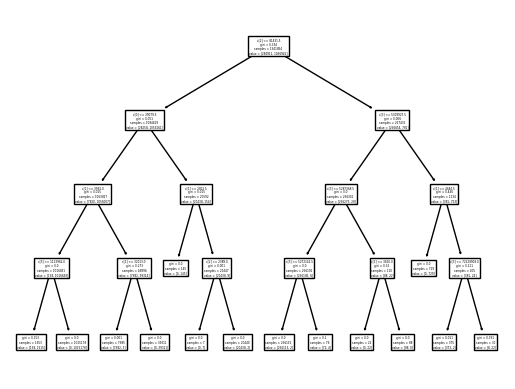

In [16]:
plot_tree(dec_tree_model)

In [17]:
xgb_model = XGBClassifier(max_depth=2, random_state = 33, n_estimators = 10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=33, ...)

In [18]:
xgb_model.score(X_test, y_test)

0.9945232491761399

In [19]:
print(evaluate(xgb_model))

(278667, 1055838, 187, 7162)
accuracy: 99.45232491761399%
false positives: 0.533739140025666%
false negatives: 0.013935942360346208%


In [20]:
cb_model = CatBoostClassifier(n_estimators = 10, random_state = 33, max_depth = 2)
cb_model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.3251143	total: 68.7ms	remaining: 619ms
1:	learn: 0.1876198	total: 91.8ms	remaining: 367ms
2:	learn: 0.1156175	total: 115ms	remaining: 267ms
3:	learn: 0.0768977	total: 140ms	remaining: 209ms
4:	learn: 0.0527703	total: 164ms	remaining: 164ms
5:	learn: 0.0380040	total: 186ms	remaining: 124ms
6:	learn: 0.0309518	total: 207ms	remaining: 88.8ms
7:	learn: 0.0211920	total: 229ms	remaining: 57.2ms
8:	learn: 0.0146475	total: 250ms	remaining: 27.8ms
9:	learn: 0.0115928	total: 272ms	remaining: 0us


In [21]:
cb_model.score(X_test, y_test)

0.9990796316141697

In [22]:
print(evaluate(cb_model))

(284777, 1055842, 183, 1052)
accuracy: 99.90796316141696%
false positives: 0.07839899124643963%
false negatives: 0.013637847336595487%


In [23]:
labels.sum()

2112967

In [24]:
len(labels)

2683708

In [25]:
labels.sum()*100.0/len(labels)

78.73311850618622

In [26]:
start = thread_time_ns()
log_reg_model.predict(X_test)
stop = thread_time_ns()
log_reg_time = (stop - start)/len(y_test)
print(f'average time for log_reg_model: {log_reg_time}ns,\nnumber of samples: {len(y_test)}')

average time for log_reg_model: 13.604176013187724ns,
number of samples: 1341854


In [27]:
start = thread_time_ns()
dec_tree_model.predict(X_test)
stop = thread_time_ns()
dec_tree_time = (stop - start)/len(y_test)
print(f'average time for dec_tree_model: {dec_tree_time}ns,\nnumber of samples: {len(y_test)}')

average time for dec_tree_model: 26.826995336303355ns,
number of samples: 1341854


In [28]:
start = thread_time_ns()
cb_model.predict(X_test)
stop = thread_time_ns()
cb_time = (stop - start)/len(y_test)
print(f'average time for cb_model: {cb_time}ns,\nnumber of samples: {len(y_test)}')

average time for cb_model: 69.0303721567324ns,
number of samples: 1341854


In [29]:
code_types = ['attack', 'no_flush', 'random', 'attack_ntmp', 'stream', 'rh4', 'rh8', 'rh9', 'rh10', 'rh20', 'double_sided']
n = df.index.size
s = 0
for ct in code_types:
    m = df.loc[df['code_type'] == ct].index.size
    print(f'{ct}: {m*100/n}%')
    s += m*100/n
print(f'total = {s}')
print(f'samples: {n}')

attack: 12.279242003973607%
no_flush: 6.59319121156251%
random: 7.172911509001724%
attack_ntmp: 13.030814082605112%
stream: 7.500778773249548%
rh4: 12.227187160451138%
rh8: 10.786605696297809%
rh9: 10.844846011563106%
rh10: 8.196830653707483%
rh20: 8.197650415022796%
double_sided: 3.169942482565167%
total = 99.99999999999999
samples: 2683708
